In [1]:
# Required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygad
import numpy
import pygad
import pygad.nn
import pygad.gann
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

## Importing DataSet ##

In [3]:
df = pd.read_csv("./heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
y = df.output
X = df.drop(columns="output")

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = .2,
                                                    random_state = 42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [6]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras import callbacks
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adamax
import random
import mplcyberpunk
def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/32
16/16 [==============================] - 1s 18ms/step - loss: 1.7531 - accuracy: 0.4545 - val_loss: 0.8938 - val_accuracy: 0.4590 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/32
16/16 [==============================] - 0s 4ms/step - loss: 0.6095 - accuracy: 0.6446 - val_loss: 0.4736 - val_accuracy: 0.8361 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/32
16/16 [==============================] - 0s 4ms/step - loss: 0.4926 - accuracy: 0.8554 - val_loss: 0.4340 - val_accuracy: 0.8361 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/32
16/16 [==============================] - 0s 4ms/step - loss: 0.4622 - accuracy: 0.8388 - val_loss: 0.6595 - val_accuracy: 0.8033 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.009999999776

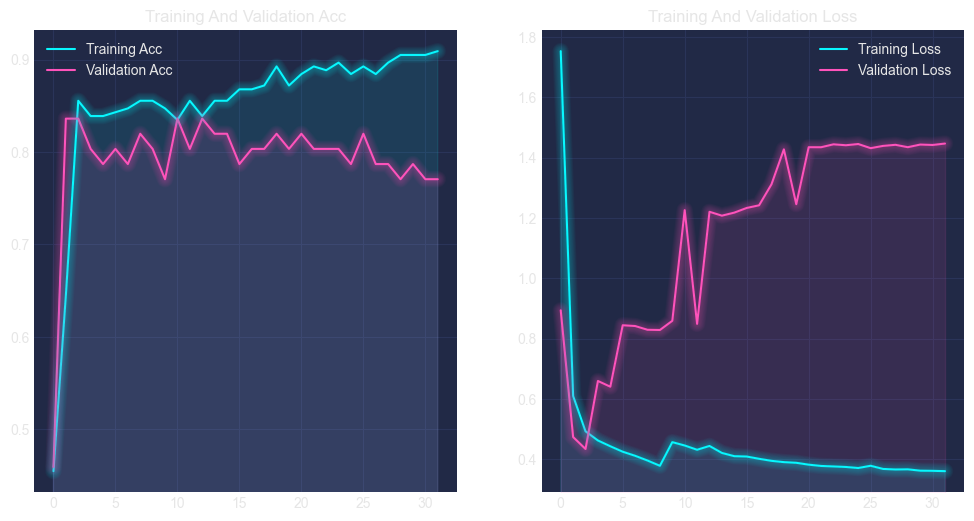

CPU times: total: 2.22 s
Wall time: 4.27 s


In [7]:
%%time
classifier = tf.keras.Sequential()
tf.compat.v1.reset_default_graph()
tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)

classifier.add(Dense(units = 8, kernel_initializer = 'uniform' , activation = 'relu', input_dim = X_train.shape[1])) 
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))

classifier.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
        loss = 'binary_crossentropy', 
        metrics = ['accuracy']
    )

# Fitting the ANN to the Training set

r = classifier.fit(
    X_train, 
    y_train,
    validation_data=(X_test,y_test),
    callbacks=[callbacks.EarlyStopping(
                        min_delta=0.0001,
                        patience=40,
                        restore_best_weights=True),
                    tf.keras.callbacks.LearningRateScheduler(
                        scheduler,
                        verbose=1
                    )
                ],
    batch_size=16,
    epochs=32
    )

acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']

plt.figure(figsize=(12, 6))
plt.style.use('cyberpunk')
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Acc')
plt.legend()
mplcyberpunk.add_glow_effects()


plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()
mplcyberpunk.add_glow_effects()
plt.show()

In [8]:
y_pred_tr = [1 if each >= 0.5 else 0 for each in classifier.predict(X_train)]
y_pred_ts = [1 if each >= 0.5 else 0 for each in classifier.predict(X_test)]
# 
print('Train Accuracy score: {0:0.2f}'.format(accuracy_score(y_train, y_pred_tr)))
print('Train ROC AUC score: {0:0.2f}'.format(roc_auc_score(y_train, y_pred_tr)))
print('Test Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred_ts)))
print('Test ROC-AUC score: {0:0.3f}'.format(roc_auc_score(y_test, y_pred_ts)))
print(confusion_matrix(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))

2/2 [==============================] - 0s 3ms/step
Train Accuracy score: 0.91
Train ROC AUC score: 0.91
Test Accuracy score: 0.77
Test ROC-AUC score: 0.766
[[20  8]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



## Genetic Algorithm with PyGAD ##

In [25]:
# Inputs

array_X = X_train #.values (Scaler function return np array and pygad working with np.array)
array_y = y_train.values
print(array_X.shape,array_y.shape)

(242, 13) (242,)


In [10]:
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs
    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

**fitness_func** memiliki inputan solution dan solution index in population, dengan nilai outputan yang di kembalikan harus memiliki nilai *fitness_number* yang semain tinggi

In [11]:
last_fitness = 0

def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks,
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    if ga_instance.generations_completed % verbose == 0:
        print("Generation = {generation}".format(generation=ga_instance.generations_completed))
        print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
        print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))

    last_fitness = ga_instance.best_solution()[1].copy();


# Holds the fitness value of the previous generation. We use this on the callback function

inisiasi fitnes_number dimulai dari angka **0**

**callback_generation** memiliki fungsi untuk mengupdate nilai *trained_weight* pada setiap jaringan dalam populasi


## Prepare the Training Data


In [28]:
#imput data
data_inputs = array_X

# output data
data_outputs = array_y

# The length of the input vector for each sample (i.e. number of neurons in the input layer).
num_inputs = data_inputs.shape[1]

# Untuk XOR model, hannya terdapat dua calss dengan label adalah hannya 0 dan 1
num_classes = 2

## Creating an initial population of neural networks.

In [27]:
num_solutions = 16

**number of solutin** dapat digunakan secara bergantian dan memiliki solusi seperti kromosom

In [ ]:
GANN_instance = pygad.gann.GANN(
                    num_solutions=num_solutions,
                    num_neurons_input=num_inputs,
                    num_neurons_hidden_layers=[8,16,32],
                    num_neurons_output=num_classes,
                    hidden_activations=["relu", "relu","relu"],
                    output_activation="sigmoid"
                )

**num_vneurons_hidden_layers** setiap nomor pada array mewakili hidden layers dari kiri ke kanan, jika nilai kosong [] maka tidak ada hidden layer yang digunakan, sebagai contoh jika `num_neurons_hidden_layers=[10]` maka diguanakan untuk membuat single hiden layer dengan 10 neuron

In [13]:
# first population
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

# prepare initial population

initial_population = population_vectors.copy()

Terdapat dua cara untuk melakukan inisialisasi population

1. Prepare it yourself and pass it to the initial_population parameter., cara ini berguna untuk memulai genetic algorithm dengan custom initial population
2. Assign valid integer values to the sol_per_pop and num_genes parameters, jika inisial population parameter tersedia kemudian sol_per_pop and num_gene tidak berguna

In [14]:
# Number of solutions to be selected as parents in the mating pool.
num_parents_mating = 4

# Number of generations
num_generations = 1000

In [15]:
parent_selection_type = "tournament"
keep_parents = -1

K_tournament=4


Number of parents di simpan pada populasi selanjutnya


## Crossover and mutation



In [29]:
crossover_type = "uniform"

crossover_probability= 1

## Mutation types

In [17]:
#Merepresentasikan gen yang akan bermutasi

mutation_percent_genes = 10 

mutation_type = "random"



jenis jenis mutasi :
- Random (for random mutation)
- Swap (for swap mutation)
- Inversion (for inversion mutation)
- Scramble (for scramble mutation)
- Adaptive (for adaptive mutation)

Jika menggunakan aditive parameter harus menggunakan berikut :

`mutation_probability = mutation_probability`

`mutation_num_genes = mutation_num_genes`

c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\pygad\nn\nn.py:156: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + numpy.exp(-1 * sop))


Generation = 100
Fitness    = 86.77685950413223
Change     = 0.0
Generation = 200
Fitness    = 89.25619834710744
Change     = 0.41322314049587305
Generation = 300
Fitness    = 91.73553719008265
Change     = 0.0
Generation = 400
Fitness    = 91.73553719008265
Change     = 0.0
Generation = 500
Fitness    = 92.14876033057851
Change     = 0.0
Generation = 600
Fitness    = 92.14876033057851
Change     = 0.0
Generation = 700
Fitness    = 92.14876033057851
Change     = 0.0
Generation = 800
Fitness    = 92.56198347107438
Change     = 0.0
Generation = 900
Fitness    = 92.56198347107438
Change     = 0.0
Generation = 1000
Fitness    = 92.56198347107438
Change     = 0.0


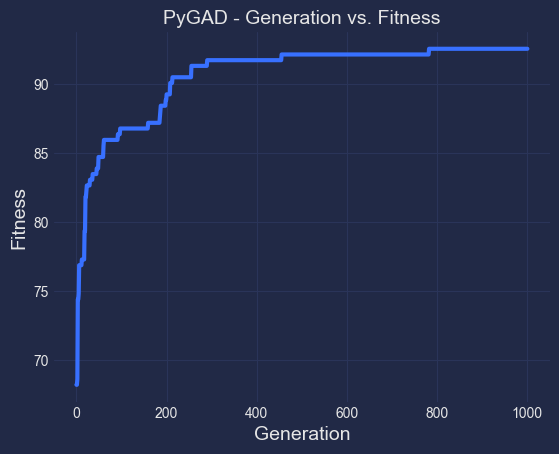

Fitness value of the best solution = 92.56198347107438
Index of the best solution : 0
Best fitness value reached after 782 generations.


In [18]:
verbose = 100
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       # Wset tournament selection
                       K_tournament=K_tournament,
                       parent_selection_type=parent_selection_type,
                       crossover_probability=crossover_probability,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

# melakukan iterasi untuk number of generatrion
ga_instance.run()

# Plot the Fitness Values
ga_instance.plot_fitness()

# Mengembalikan nilai detail dari best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()

print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs)

## Calculating Some Statistics

Berdasarkan prediksi jaringan yang dibuat, beberapa statistik dapat dihitung seperti jumlah prediksi yang benar dan salah selain akurasi klasifikasi.

In [19]:
# Calculating some statistics
num_wrong = numpy.where(predictions != data_outputs)[0]
num_correct = data_outputs.size - num_wrong.size
accuracy = 100 * (num_correct/data_outputs.size)
print("Number of correct classifications : {num_correct}.".format(num_correct=num_correct))
print("Number of wrong classifications : {num_wrong}.".format(num_wrong=num_wrong.size))
print("Classification accuracy : {accuracy}.".format(accuracy=accuracy))

Number of correct classifications : 224.
Number of wrong classifications : 18.
Classification accuracy : 92.56198347107438.


In [20]:
y_pred_tr = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=X_train)
y_pred_ts = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=X_test)


print('Train Accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_tr)))
print('Train ROC AUC score: {0:0.4f}'.format(roc_auc_score(y_train, y_pred_tr)))
print('Test Accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_ts)))
print('Test ROC-AUC score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred_ts)))
print(confusion_matrix(y_test,y_pred_ts))
print(classification_report(y_test,y_pred_ts))

Train Accuracy score: 0.9256
Train ROC AUC score: 0.9212
Test Accuracy score: 0.7869
Test ROC-AUC score: 0.7814
[[20  8]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



## PyGAD: 
* Train Accuracy score: 0.8967
* Train ROC AUC score: 0.8955
* Test Accuracy score: 0.8033
* Test ROC-AUC score: 0.7992

## Keras:
* Train Accuracy score: 0.90
* Train ROC AUC score: 0.90
* Test Accuracy score: 0.75
* Test ROC-AUC score: 0.746


## Adaptive mutation example

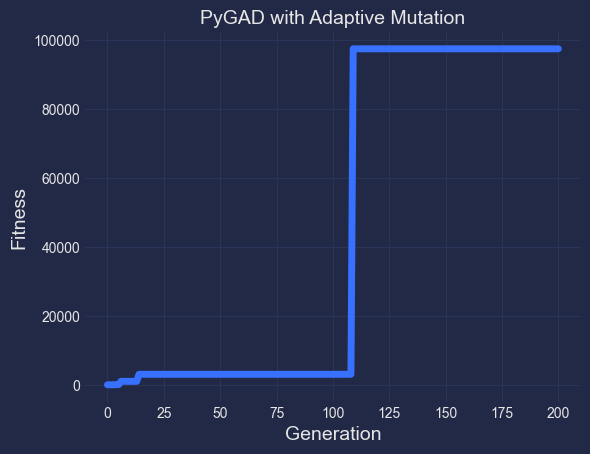

CPU times: total: 4.17 s
Wall time: 5.28 s


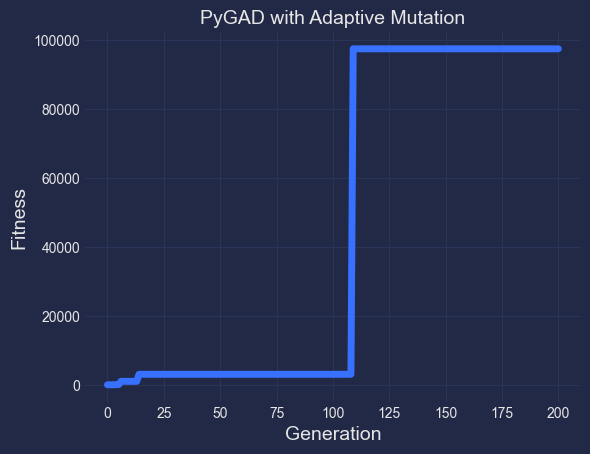

In [21]:
%%time
import pygad
import numpy

function_inputs = np.random.randn(40) # Function inputs.
desired_output = 44 # Function output.

def fitness_func_adaptive(solution, solution_idx):
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    # The value 0.000001 is used to avoid the Inf value when the denominator numpy.abs(output - desired_output) is 0.0.
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=200,
                       fitness_func=fitness_func_adaptive,
                       num_parents_mating=10,
                       mutation_percent_genes= (25,12),
                       mutation_probability=(0.35,0.12),
                       mutation_num_genes=(4,2),
                       sol_per_pop=200,
                       num_genes=len(function_inputs),
                       mutation_type="adaptive")

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness(title="PyGAD with Adaptive Mutation", linewidth=5)

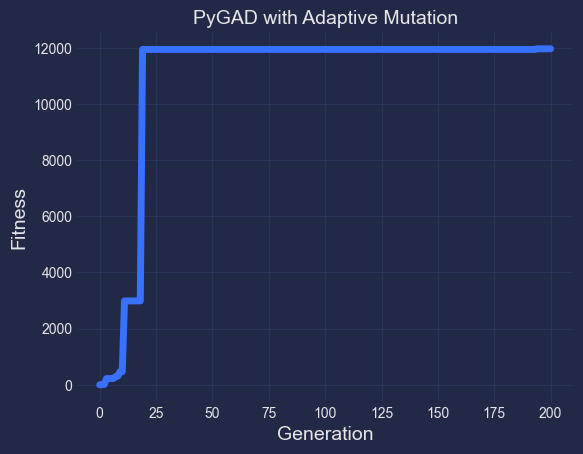

CPU times: total: 2.64 s
Wall time: 3.34 s


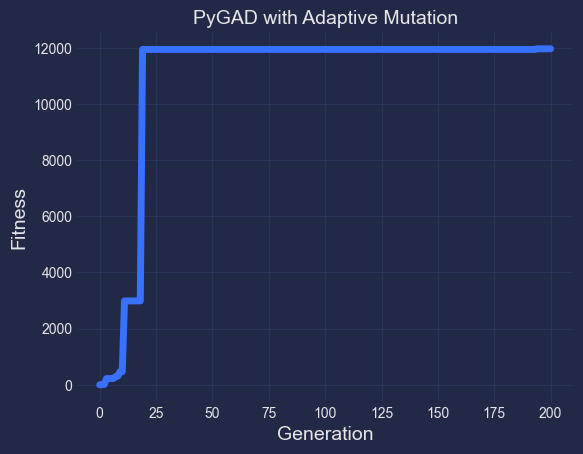

In [22]:
%%time
ga_instance = pygad.GA(num_generations=200,
                       fitness_func=fitness_func_adaptive,
                       num_parents_mating=10,
                       mutation_percent_genes= 10,
                       sol_per_pop=200,
                       num_genes=len(function_inputs),
                       mutation_type="random")

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness(title="PyGAD with Adaptive Mutation", linewidth=5)

[Other informative pages](https://www.generativedesign.org/02-deeper-dive/02-04_genetic-algorithms)